In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold

%matplotlib inline

In [2]:
# Import MNIST data
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

pixel_values, targets = data
targets = targets.astype(int)

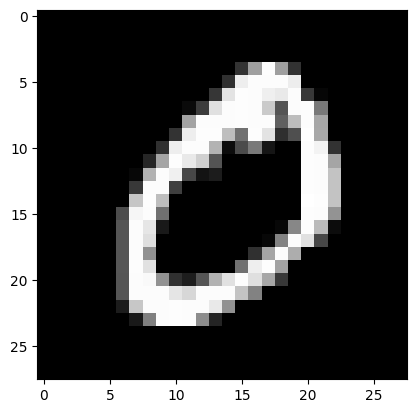

In [3]:
#check one of the data point, convert the 784(28*28) to the 2 dimensional numpy array
single_image = pixel_values.iloc[1, :].to_numpy().reshape(28, 28)

plt.imshow(single_image, cmap='gray')

In [25]:
#Creates the t-SNE transformation of the data
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :].to_numpy())

tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000].to_numpy())),
columns=["x","y","targets"]
)

tsne_df["targets"] = tsne_df["targets"].astype(int)

In [27]:
tsne_df.head(10)

,x,y,targets
0,22.097414,8.600863,5
1,55.375954,13.310727,0
2,3.633045,-48.729393,4
3,-49.647701,9.427806,1
4,-7.452151,-28.308376,9
5,-21.250423,1.677772,2
6,-13.709572,23.895178,1
7,7.517456,31.048033,3
8,-18.517723,21.175573,1
9,-20.546209,-25.127945,4


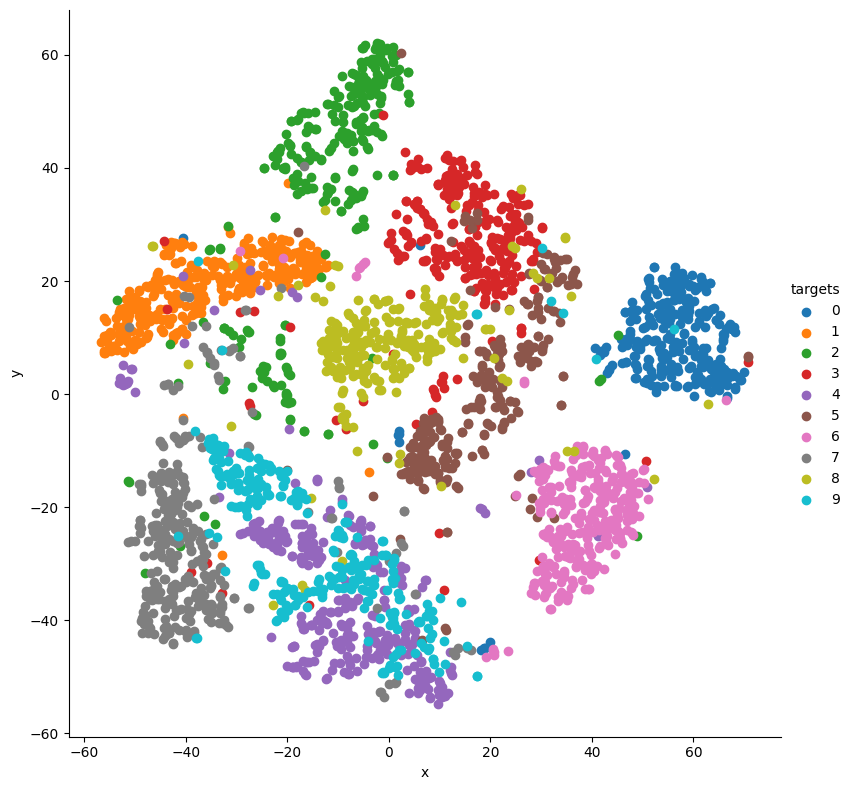

In [34]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)

grid.map(plt.scatter, "x", "y").add_legend()